# 4.2 Classifying newswires: A multiclass classification example

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Listing 4.13 Encoding the input data

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**One hot encoding for the multiclasses**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.0
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 101ms/step - loss: 2.4432 - accuracy: 0.4866 - val_loss: 1.6190 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 1s 82ms/step - loss: 1.4207 - accuracy: 0.6785 - val_loss: 1.2731 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 1s 88ms/step - loss: 1.0903 - accuracy: 0.7494 - val_loss: 1.1200 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 85ms/step - loss: 0.8533 - accuracy: 0.8078 - val_loss: 1.0611 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 2s 120ms/step - loss: 0.6854 - accuracy: 0.8416 - val_loss: 1.0925 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 2s 124ms/step - loss: 0.5594 - accuracy: 0.8697 - val_loss: 1.0249 - val_accuracy: 0.7800
Epoch 7/20
16/16 [==============================] - 1s 80ms/step - loss: 0.4431 - accuracy: 0.8996 - val_loss: 0.9133 - val_accuracy: 0.8060
Epoch 8/20

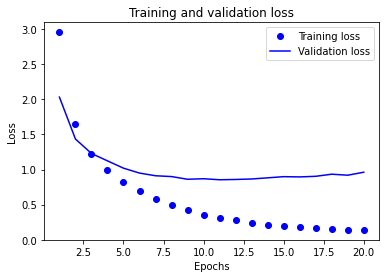

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

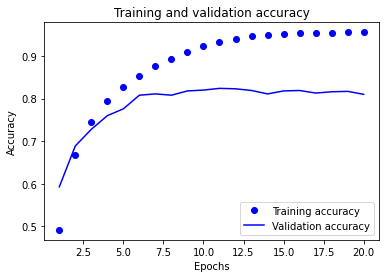

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1710 - accuracy: 0.7867


**Test what would have been accuracy if totally random classification**

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

In [ ]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))
print(train_data[0])

71/71 [==============================] - 0s 4ms/step
3
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
